<a href="https://colab.research.google.com/github/ShraddhaAtreya/Calorie-prediction-of-starbucks-drinks-dataset/blob/main/starbucks_drinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=2656a140500e5e6eda0002938a4ca947b481d7bf90ddb23da40c1fa4f62c4574
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv('/content/sample_data/starbucks-menu-nutrition-drinks2.csv',header = True, inferSchema = True)
df.printSchema()

root
 |-- c0: string (nullable = true)
 |-- Calories: string (nullable = true)
 |-- Fat (g): string (nullable = true)
 |-- Carb (g): string (nullable = true)
 |-- Fiber (g): string (nullable = true)
 |-- Protein: string (nullable = true)
 |-- Sodium: string (nullable = true)



In [ ]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns)

,c0,Calories,Fat (g),Carb (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers��� Be,45,0,11,0,0,10
1,Ombr�� Pink D,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers��� Be,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers��� Be,60,0,14,1,0,10


In [ ]:
df.count(), df.drop_duplicates().count(), df.dropna().count()

(177, 155, 177)

In [ ]:
df.show()

+--------------------+--------+-------+--------+---------+-------+------+
|                  c0|Calories|Fat (g)|Carb (g)|Fiber (g)|Protein|Sodium|
+--------------------+--------+-------+--------+---------+-------+------+
|Cool Lime Starbuc...|      45|      0|      11|        0|      0|    10|
|       Ombr�� Pink D|       -|      -|       -|        -|      -|     -|
|          Pink Drink|       -|      -|       -|        -|      -|     -|
|Strawberry Acai S...|      80|      0|      18|        1|      0|    10|
|Very Berry Hibisc...|      60|      0|      14|        1|      0|    10|
|        Violet Drink|       -|      -|       -|        -|      -|     -|
|Evolution Fresh��...|       -|      -|       -|        -|      -|     -|
|Evolution Fresh��...|       -|      -|       -|        -|      -|     -|
|Evolution Fresh��...|     110|      0|      28|        0|      0|     5|
|         Iced Coffee|       0|      0|       0|        0|      0|     0|
|Iced Coffee with ...|       -|      -

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.regression import LinearRegression
from pyspark.sql.types import DoubleType

In [ ]:
df = df.withColumn("Calories", df["Calories"].cast(DoubleType()))
df = df.withColumn("Fat (g)", df["Fat (g)"].cast(DoubleType()))
df = df.withColumn("Carb (g)", df["Carb (g)"].cast(DoubleType()))
df = df.withColumn("Fiber (g)", df["Fiber (g)"].cast(DoubleType()))
df = df.withColumn("Protein", df["Protein"].cast(DoubleType()))
df = df.withColumn("Sodium", df["Sodium"].cast(DoubleType()))

In [ ]:
df.show()

+--------------------+--------+-------+--------+---------+-------+------+
|                  c0|Calories|Fat (g)|Carb (g)|Fiber (g)|Protein|Sodium|
+--------------------+--------+-------+--------+---------+-------+------+
|Cool Lime Starbuc...|    45.0|    0.0|    11.0|      0.0|    0.0|  10.0|
|       Ombr�� Pink D|    NULL|   NULL|    NULL|     NULL|   NULL|  NULL|
|          Pink Drink|    NULL|   NULL|    NULL|     NULL|   NULL|  NULL|
|Strawberry Acai S...|    80.0|    0.0|    18.0|      1.0|    0.0|  10.0|
|Very Berry Hibisc...|    60.0|    0.0|    14.0|      1.0|    0.0|  10.0|
|        Violet Drink|    NULL|   NULL|    NULL|     NULL|   NULL|  NULL|
|Evolution Fresh��...|    NULL|   NULL|    NULL|     NULL|   NULL|  NULL|
|Evolution Fresh��...|    NULL|   NULL|    NULL|     NULL|   NULL|  NULL|
|Evolution Fresh��...|   110.0|    0.0|    28.0|      0.0|    0.0|   5.0|
|         Iced Coffee|     0.0|    0.0|     0.0|      0.0|    0.0|   0.0|
|Iced Coffee with ...|    NULL|   NULL

In [ ]:
df = df.na.drop()

In [ ]:
df.show()

+--------------------+--------+-------+--------+---------+-------+------+
|                  c0|Calories|Fat (g)|Carb (g)|Fiber (g)|Protein|Sodium|
+--------------------+--------+-------+--------+---------+-------+------+
|Cool Lime Starbuc...|    45.0|    0.0|    11.0|      0.0|    0.0|  10.0|
|Strawberry Acai S...|    80.0|    0.0|    18.0|      1.0|    0.0|  10.0|
|Very Berry Hibisc...|    60.0|    0.0|    14.0|      1.0|    0.0|  10.0|
|Evolution Fresh��...|   110.0|    0.0|    28.0|      0.0|    0.0|   5.0|
|         Iced Coffee|     0.0|    0.0|     0.0|      0.0|    0.0|   0.0|
|Iced Espresso Cla...|   130.0|    2.5|    21.0|      0.0|    5.0|  65.0|
|Iced Espresso Cla...|   140.0|    2.5|    23.0|      0.0|    5.0|  90.0|
|Iced Espresso Cla...|   130.0|    2.5|    21.0|      0.0|    5.0|  65.0|
|    Shaken Sweet Tea|    80.0|    0.0|    19.0|      0.0|    0.0|  10.0|
|Tazo�� Bottled Be...|    60.0|    0.0|    15.0|      0.0|    0.0|  10.0|
|Tazo�� Bottled Bl...|   150.0|    0.0

In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

In [ ]:
df.printSchema()

root
 |-- c0: string (nullable = true)
 |-- Calories: double (nullable = true)
 |-- Fat (g): double (nullable = true)
 |-- Carb (g): double (nullable = true)
 |-- Fiber (g): double (nullable = true)
 |-- Protein: double (nullable = true)
 |-- Sodium: double (nullable = true)



In [ ]:
categoricalColumns = ['c0']

In [ ]:
stages = []
cols = df.columns
for categoricalCol in categoricalColumns:
  stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
  stages += [stringIndexer, encoder]

numericCols = ['Calories', 'Fat (g)', 'Carb (g)', 'Fiber (g)', 'Protein', 'Sodium']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)

selectedCols = ['Calories', 'features']
df = df.select(selectedCols)
df.printSchema()


root
 |-- Calories: double (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
df.show()

+--------+--------------------+
|Calories|            features|
+--------+--------------------+
|    45.0|(79,[30,73,75,78]...|
|    80.0|(79,[60,73,75,76,...|
|    60.0|(79,[72,73,75,76,...|
|   110.0|(79,[32,73,75,78]...|
|     0.0|      (79,[0],[1.0])|
|   130.0|(79,[3,73,74,75,7...|
|   140.0|(79,[1,73,74,75,7...|
|   130.0|(79,[2,73,74,75,7...|
|    80.0|(79,[50,73,75,78]...|
|    60.0|(79,[5,73,75,78],...|
|   150.0|(79,[6,73,75,78],...|
|   140.0|(79,[7,73,75,78],...|
|   140.0|(79,[8,73,75,78],...|
|   150.0|(79,[9,73,75,78],...|
|    70.0|(79,[10,73,75,78]...|
|   120.0|(79,[11,73,75,78]...|
|   140.0|(79,[12,73,75,78]...|
|    60.0|(79,[13,73,75,78]...|
|   120.0|(79,[14,73,75,78]...|
|   140.0|(79,[15,73,75,78]...|
+--------+--------------------+
only showing top 20 rows



In [ ]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 66
Test Dataset Count: 26


In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Calories', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train)

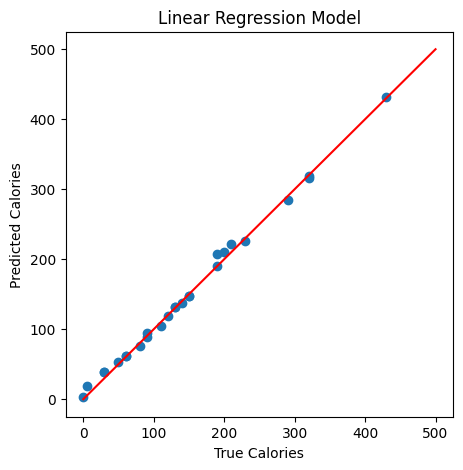

Root Mean Squared Error (RMSE) on test data = 6.56386
R2 on test data: 0.996071954098091


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the evaluation metric and curve
plt.figure(figsize=(5, 5))
plt.scatter(test.select("Calories").collect(), predictions.select("prediction").collect())
plt.plot([0, 500], [0, 500], 'r-')
plt.xlabel("True Calories")
plt.ylabel("Predicted Calories")
plt.title("Linear Regression Model")
plt.show()

# Evaluate the model by computing the root mean squared error on the test data.
predictions = lr_model.transform(test)
errors = predictions.select("Calories", "prediction").rdd.map(lambda x: x[0] - x[1]).map(lambda x: x * x).collect()
rmse = np.sqrt(sum(errors) / len(errors))
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Print the accuracy of the model
evaluator = RegressionEvaluator(labelCol="Calories", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R2 on test data: " + str(r2))


+-----------------+--------+--------------------+
|       prediction|Calories|            features|
+-----------------+--------+--------------------+
|4.285714285714286|     0.0|      (79,[0],[1.0])|
|4.285714285714286|     5.0|(79,[49,73,77,78]...|
|             10.0|    30.0|(79,[62,73,75,78]...|
|             10.0|    30.0|(79,[64,73,75,78]...|
|             45.0|    50.0|(79,[57,73,75,77]...|
+-----------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 17.5892
R2 on test data: 0.9717934735301474


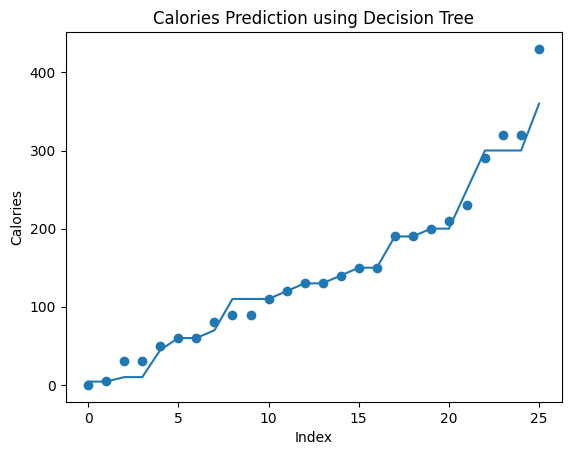

In [ ]:
import matplotlib.pyplot as plt
from pyspark.ml.regression import DecisionTreeRegressor
import numpy as np
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Calories')
dt_model = dt.fit(train)
dt_predictions = dt_model.transform(test)
dt_predictions.select('prediction', 'Calories', 'features').show(5)


# Create a DecisionTreeRegressor instance
dt = DecisionTreeRegressor(featuresCol='features', labelCol='Calories')

# Train the model
model = dt.fit(train)

# Make predictions on the test set
predictions = model.transform(test)

# Calculate and print the RMSE
evaluator = RegressionEvaluator(labelCol="Calories", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Calculate and print the R2
evaluator = RegressionEvaluator(labelCol="Calories", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R2 on test data: " + str(r2))
x_ax = range(len(dt_predictions.select('Calories').collect()))
plt.scatter(x_ax, dt_predictions.select('Calories').collect())
plt.plot(x_ax, dt_predictions.select('prediction').collect())
plt.xlabel('Index')
plt.ylabel('Calories')
plt.title('Calories Prediction using Decision Tree')
plt.show()




Root Mean Squared Error (RMSE) on test data = 17.5958
R2 on test data: 0.9717723648754628


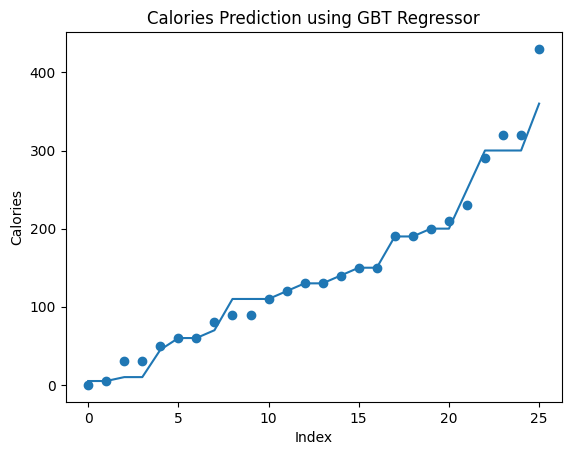

In [ ]:
# prompt: plot graph for GBT regressor model and calculate rmse value and r2 value

import matplotlib.pyplot as plt
# Create a GBTRegressor instance
gbt = GBTRegressor(featuresCol='features', labelCol='Calories')

# Train the model
model = gbt.fit(train)

# Make predictions on the test set
predictions = model.transform(test)

# Calculate and print the RMSE
evaluator = RegressionEvaluator(labelCol="Calories", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Calculate and print the R2
evaluator = RegressionEvaluator(labelCol="Calories", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
print("R2 on test data: " + str(r2))

# Plot the predictions versus the actual values
x_ax = range(len(predictions.select('Calories').collect()))
plt.scatter(x_ax, predictions.select('Calories').collect())
plt.plot(x_ax, predictions.select('prediction').collect())
plt.xlabel('Index')
plt.ylabel('Calories')
plt.title('Calories Prediction using GBT Regressor')
plt.show()


In [ ]:
# Perform predictions
lr_predictions = lr_model.transform(test)
lr_predictions.select("prediction","Calories","features").show(5)

+------------------+--------+--------------------+
|        prediction|Calories|            features|
+------------------+--------+--------------------+
|3.0369981084474738|     0.0|      (79,[0],[1.0])|
|18.408102904610587|     5.0|(79,[49,73,77,78]...|
| 39.11038986113448|    30.0|(79,[62,73,75,78]...|
| 39.11038986113448|    30.0|(79,[64,73,75,78]...|
| 52.86365313170139|    50.0|(79,[57,73,75,77]...|
+------------------+--------+--------------------+
only showing top 5 rows



In [ ]:
# Evaluate prediction accuracy (R2)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Calories",metricName="r2")
print(lr_evaluator.evaluate(lr_predictions))

0.996071954098091


In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Calories')
dt_model = dt.fit(train)

In [ ]:
dt_predictions = dt_model.transform(test)
dt_predictions.show(5)

+--------+--------------------+-----------------+
|Calories|            features|       prediction|
+--------+--------------------+-----------------+
|     0.0|      (79,[0],[1.0])|4.285714285714286|
|     5.0|(79,[49,73,77,78]...|4.285714285714286|
|    30.0|(79,[62,73,75,78]...|             10.0|
|    30.0|(79,[64,73,75,78]...|             10.0|
|    50.0|(79,[57,73,75,77]...|             45.0|
+--------+--------------------+-----------------+
only showing top 5 rows



In [ ]:
dt_evaluator = RegressionEvaluator(
    labelCol="Calories", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator.evaluate(dt_predictions)
print(r2)

0.9717934735301474


In [ ]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'Calories', maxIter=50)
gbt_model = gbt.fit(train)

In [ ]:
#Perform predictions
gbt_predictions = gbt_model.transform(test)
gbt_predictions.select('prediction', 'Calories', 'features').show(5)

+-----------------+--------+--------------------+
|       prediction|Calories|            features|
+-----------------+--------+--------------------+
|4.999987256717026|     0.0|      (79,[0],[1.0])|
|4.999987256717026|     5.0|(79,[49,73,77,78]...|
|             10.0|    30.0|(79,[62,73,75,78]...|
|             10.0|    30.0|(79,[64,73,75,78]...|
|             45.0|    50.0|(79,[57,73,75,77]...|
+-----------------+--------+--------------------+
only showing top 5 rows



In [ ]:
gbt_evaluator = RegressionEvaluator(
    labelCol="Calories", predictionCol="prediction", metricName="r2")
r2 = gbt_evaluator.evaluate(gbt_predictions)
print(r2)

0.971772005099819


In [ ]:
!pip install chardet

In [ ]:
import chardet

In [ ]:
with open('/content/sample_data/starbucks-menu-nutrition-drinks2.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('/content/sample_data/starbucks-menu-nutrition-drinks2.csv', encoding=encoding)
df1.nunique()

c0           153
Calories      30
Fat (g)       15
Carb (g)      34
Fiber (g)      8
Protein       17
Sodium        25
dtype: int64

In [ ]:
df1 = spark.read.csv('/content/sample_data/starbucks-menu-nutrition-drinks2.csv', header=True, inferSchema=True)

In [ ]:
df1 = df1.withColumn("Calories", df1["Calories"].cast("double"))
df1 = df1.withColumn("Fat (g)", df1["Fat (g)"].cast("double"))
df1 = df1.withColumn("Carb (g)", df1["Carb (g)"].cast("double"))
df1 = df1.withColumn("Fiber (g)", df1["Fiber (g)"].cast("double"))
df1 = df1.withColumn("Protein", df1["Protein"].cast("double"))
df1 = df1.withColumn("Sodium", df1["Sodium"].cast("double"))

<ipython-input-59-dd99fdfdc600>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Protein', y='Calories', data=df1.toPandas(), palette='Set1')


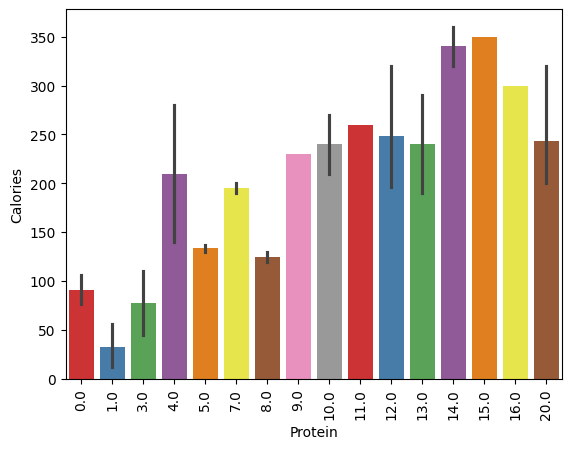

<ipython-input-59-dd99fdfdc600>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sodium', y='Calories', data=df1.toPandas(), palette='Set2')


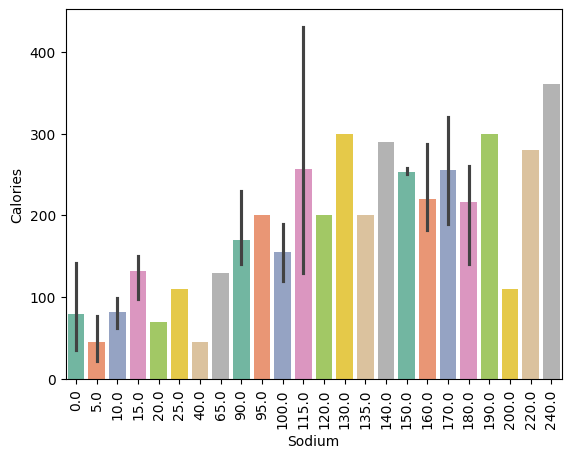

In [ ]:
sns.barplot(x='Protein', y='Calories', data=df1.toPandas(), palette='Set1')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='Sodium', y='Calories', data=df1.toPandas(), palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import chardet

In [ ]:
with open('/content/sample_data/starbucks-menu-nutrition-drinks2.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df2 = pd.read_csv('/content/sample_data/starbucks-menu-nutrition-drinks2.csv', encoding=encoding)
df2.nunique()


c0           153
Calories      30
Fat (g)       15
Carb (g)      34
Fiber (g)      8
Protein       17
Sodium        25
dtype: int64

In [ ]:
correlation_matrix = df2.corr()

<ipython-input-40-15450d8dcb01>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


<ipython-input-60-732c28ee75bf>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Protein', y='Fat (g)', data=df_pd, palette='Set3')


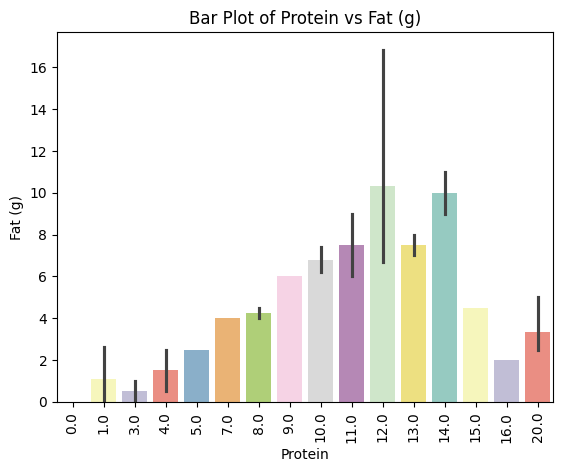

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame containing 'Protein' and 'Fat (g)' columns

# Check for NaN values and drop them
df2 = df2.dropna(subset=['Protein', 'Fat (g)'])

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Collect data from PySpark DataFrame and convert to Pandas DataFrame
df_pd = df1.collect()
df_pd = pd.DataFrame(df_pd, columns=df1.columns)

# Plot using Seaborn with the Pandas DataFrame
sns.barplot(x='Protein', y='Fat (g)', data=df_pd, palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Protein')
plt.ylabel('Fat (g)')
plt.title('Bar Plot of Protein vs Fat (g)')
plt.show()



<ipython-input-66-3df70bd13125>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_pd.corr(), annot=True, cmap='mako', fmt=".2f", linewidths=.5)


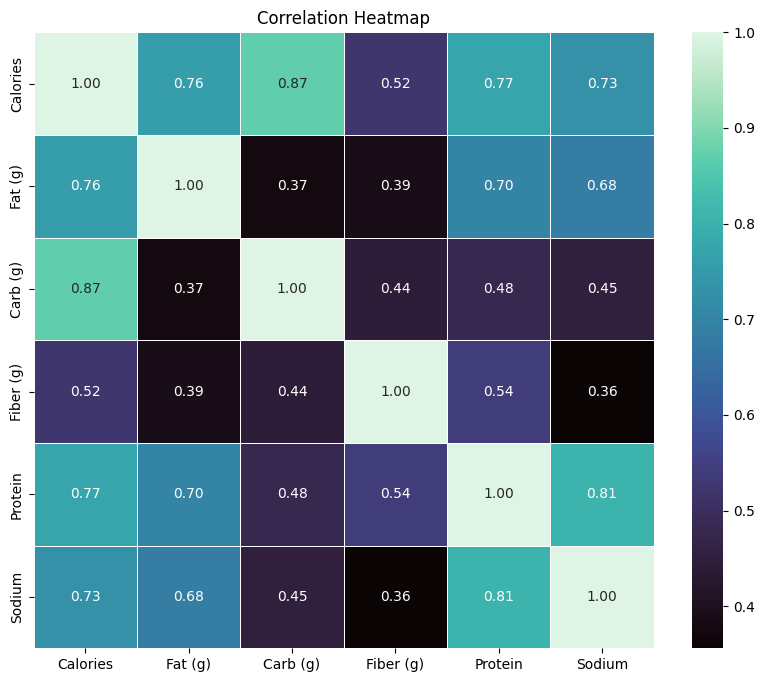

In [ ]:
df_pd = df1.toPandas()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pd.corr(), annot=True, cmap='mako', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()